In [191]:
import time

# visualizatoin 
import matplotlib.pyplot as plt 

# data wrangling
import pandas as pd
import numpy as np 

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer

# learning
from sklearn.linear_model import LogisticRegression

In [192]:
import sklearn.metrics as metrics

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
from fairlearn.metrics import MetricFrame, make_derived_metric
from sklearn.metrics import precision_score
from fairlearn.metrics import selection_rate, false_positive_rate, false_negative_rate
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference
from sklearn.calibration import CalibrationDisplay
#settings
sns.set_style('whitegrid') # for pretty plots

# Load data
If you put the data set in the same folder as this notebook, you can use the following code to load the data set. 

In [194]:
# description
description = pd.read_csv('WiDS_Datathon_2020_Dictionary.csv')
description_dict = description.set_index('Variable Name').to_dict(orient='index')
# data
df = pd.read_csv('training_v2.csv')

df.head()

encounter_id  patient_id  hospital_id  hospital_death   age    bmi  elective_surgery  ethnicity gender  height hospital_admit_source           icu_admit_source  icu_id icu_stay_type      icu_type  pre_icu_los_days  readmission_status  weight  albumin_apache  apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  resprate_apache  sodium_apache  temp_apache  urineoutput_apache  ventilated_apache  wbc_apache  d1_diasbp_invasive_max  d1_diasbp_invasive_min  d1_diasbp_max  d1_diasbp_min  d1_diasbp_noninvasive_max  d1_diasbp_noninvasive_min  d1_heartrate_max  d1_heartrate_min  d1_mbp_invasive_max  d1_mbp_invasive_min  d1_mbp_max  d1_mbp_min  d1_mbp_noninvasive_max  d1_mbp_noninvasive_min  d1_resprate_max  d1_resprate_min  d1_spo2_max  d1_spo2_min  d1_sysbp_invasive_max  d1_sysbp_invasive_min  d1_sysbp_max  d1_sysbp_min  d1_sysbp_noninvasive_max  d1_sysbp_noninvasive_min  d1_temp_max  d1_temp_min  h1_diasbp_invasive_max  h1_diasbp_invasive_min  h1_diasbp_max  h1_diasbp_min  h1_diasbp_noninvasive_max  h1_diasbp_noninvasive_min  h1_heartrate_max  h1_heartrate_min  h1_mbp_invasive_max  h1_mbp_invasive_min  h1_mbp_max  h1_mbp_min  h1_mbp_noninvasive_max  h1_mbp_noninvasive_min  h1_resprate_max  h1_resprate_min  h1_spo2_max  h1_spo2_min  h1_sysbp_invasive_max  h1_sysbp_invasive_min  h1_sysbp_max  h1_sysbp_min  h1_sysbp_noninvasive_max  h1_sysbp_noninvasive_min  h1_temp_max  h1_temp_min  d1_albumin_max  d1_albumin_min  d1_bilirubin_max  d1_bilirubin_min  d1_bun_max  d1_bun_min  d1_calcium_max  d1_calcium_min  d1_creatinine_max  d1_creatinine_min  d1_glucose_max  d1_glucose_min  d1_hco3_max  d1_hco3_min  d1_hemaglobin_max  d1_hemaglobin_min  d1_hematocrit_max  d1_hematocrit_min  d1_inr_max  d1_inr_min  d1_lactate_max  d1_lactate_min  d1_platelets_max  d1_platelets_min  d1_potassium_max  d1_potassium_min  d1_sodium_max  d1_sodium_min  d1_wbc_max  d1_wbc_min  h1_albumin_max  h1_albumin_min  h1_bilirubin_max  h1_bilirubin_min  h1_bun_max  h1_bun_min  h1_calcium_max  h1_calcium_min  h1_creatinine_max  h1_creatinine_min  h1_glucose_max  h1_glucose_min  h1_hco3_max  h1_hco3_min  h1_hemaglobin_max  h1_hemaglobin_min  h1_hematocrit_max  h1_hematocrit_min  h1_inr_max  h1_inr_min  h1_lactate_max  h1_lactate_min  h1_platelets_max  h1_platelets_min  h1_potassium_max  h1_potassium_min  h1_sodium_max  h1_sodium_min  h1_wbc_max  h1_wbc_min  d1_arterial_pco2_max  d1_arterial_pco2_min  d1_arterial_ph_max  d1_arterial_ph_min  d1_arterial_po2_max  d1_arterial_po2_min  d1_pao2fio2ratio_max  d1_pao2fio2ratio_min  h1_arterial_pco2_max  h1_arterial_pco2_min  h1_arterial_ph_max  h1_arterial_ph_min  h1_arterial_po2_max  h1_arterial_po2_min  h1_pao2fio2ratio_max  h1_pao2fio2ratio_min  apache_4a_hospital_death_prob  apache_4a_icu_death_prob  aids  cirrhosis  diabetes_mellitus  hepatic_failure  immunosuppression  leukemia  lymphoma  solid_tumor_with_metastasis apache_3j_bodysystem apache_2_bodysystem
0  66154         25312       118          0               68.0  22.73  0                 Caucasian  M      180.3   Floor                 Floor                      92      admit         CTICU         0.541667          0                   73.9    2.3             113.0               502.01               0                      0.0         0.4               31.0        2.51              NaN           3.0              6.0               0.0                4.0                168.0           118.0              27.4               0.0               40.0       NaN           NaN                  NaN          NaN         36.0             134.0          39.3        NaN                  0.0                14.1        46.0                    32.0                    68.0           37.0          

The dataset contains many different variables, including:

#### Target variable
* *hospital_death*: 'Whether the patient died during this hospitalization'.

#### Identifiers
* *patient_id*: Unique identifier associated with a patient
* *encounter_id*: Unique identifier associated with a patient unit stay
* *hospital_id*: Unique identifier associated with a hospital
* *icu_id*: A unique identifier for the unit to which the patient was admitted

#### Demographics
* *age*: The age of the patient on unit admission.
* *bmi*: The body mass index of the person on unit admission.
* *ethnicity*: The common national or cultural tradition which the person belongs to.
* *gender*: The genotypical sex of the patient.
* *height*: The height of the person on unit admission

#### Health indicators
A few examples:
* *elective_surgery*: Whether the patient was admitted to the hospital for an elective surgical operation
* *h1_diasbp_invasive_max*: The patient's highest diastolic blood pressure during the first hour of their unit stay, invasively measured
* *h1_diasbp_invasive_min*: The patient's lowest diastolic blood pressure during the first hour of their unit stay, invasively measured
* *gcs_verbal_apache*: The verbal component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score
* *immunosuppression*: Whether the patient has their immune system suppressed within six months prior to ICU admission for any of the following reasons; radiation therapy, chemotherapy, use of non-cytotoxic immunosuppressive drugs, high dose steroids (at least 0.3 mg/kg/day of methylprednisolone or equivalent for at least 6 months).

In [5]:
# you can retrieve the description of a variable in the data set from the description dictionary as follows
description_dict['immunosuppression']

{'Category': 'APACHE comorbidity',
 'Unit of Measure': 'None',
 'Data Type': 'binary',
 'Description': 'Whether the patient has their immune system suppressed within six months prior to ICU admission for any of the following reasons; radiation therapy, chemotherapy, use of non-cytotoxic immunosuppressive drugs, high dose steroids (at least 0.3 mg/kg/day of methylprednisolone or equivalent for at least 6 months).',
 'Example': '1'}

# Pre-processing
This is a real-world data set, meaning that it is **messy**. Two key difficulties are categorial features and missing values.

> **To avoid information leakage, any pre-processing steps must be based on the training data only.** For example, when we compute the mean, this must be computed based on the training data set.

### Categorical Features
Many (implementations of) machine learning algorithms cannot handle categorical features automatically. This is often dealt with through *one-hot-encoding*, where each category of a feature is transformed into a binary feature.

When a feature contains many categories, this results in a very sparse data set with many features. As such, it can be worthwile to use domain expertise to merge particular categories in order to reduce the number of one-hot-encoded features.

### Missing Values
The data set contains a lot of missing values (around 35% of the values is missing). There are several ways to deal with this, some ideas to try:

* Replace missing values with the mean (numerical features) or median (categorical features), e.g., using [`SimpleImputer`](https://scikit-learn.org/stable/modules/impute.html#univariate-feature-imputation).
* Drop features with many missing values.
* Model-based imputation strategies, such as [KNNImputer](https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation).
* Domain-knowledge inspired replacement. For example, for features related to medical measurements, it is expected that the entered data is abnormal in some way. As such, replacing by the mean or median can paint a skewed picture. One way to deal with this would be to identify a normal range for different measurements, based on domain expertise. *Note: this is a very time consuming strategy which we do not necessarily recommend in the time span of this project.*

We encourage you to try several approaches and see what works best.

## Example of  Minimal Pre-Processing
Below you can find an example of pre-processing the data set for classification. We showcase both 'manual' pre-processing steps through `pandas` as well as a (small) scikit-learn `Pipeline`. Feel free to use whatever you are most comfortable with in your project.

In [6]:
test_size = 0.2 # proportion for train versus test+val split
val_size = 0.5 # proportion for test versus val split
random_state = 42  # random state is used to set a seed for randomness, which is only relevant for reproducibility purposes
max_missing = 0.8  # maximum percentage of missing values for a column to be dropped

In [7]:
start_time = time.time()

# save features
X = df.copy().drop(['hospital_death', 'patient_id', 'encounter_id', 'hospital_id', 'icu_id', # drop identifiers
                    'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', # drop APACHE scores
                    'apache_2_bodysystem'], # drop because of similarity with apache_3j_bodysystem
                   axis=1)
# save target variable
y = df['hospital_death'].copy()
# save APACHE scores for later evaluation on train / test / validation data
y_apache = df['apache_4a_hospital_death_prob'].copy()

""" SPLIT DATA SET """
# split the dataset into train and test+validation set
(
    X_train,
    X_test,
    y_train,
    y_test,
    y_apache_train,
    y_apache_test,
    ) = train_test_split(X, y, y_apache, 
                         test_size=test_size, # used for testing and validation
                         random_state=random_state # for reproducibility
                        ) 
# split the test set into test + validation set
(
    X_val,
    X_test,
    y_val,
    y_test,
    y_apache_val,
    y_apache_test,
    ) = train_test_split(X_test, y_test, y_apache_test, 
                         test_size=val_size, # used for testing and validation
                         random_state=random_state # for reproducibility
                        ) 

"""MISSING VALUES"""
# drop columns with many missing values
missing = X_train.isna().sum() > max_missing * len(X_train)
missing = missing[missing].index
X_train = X_train.drop(missing, axis=1)
X_val = X_val.drop(missing, axis=1)
X_test = X_test.drop(missing, axis=1)

"""FURTHER PROCESSING PIPELINE"""
# define pre-processing steps for numerical features
num_transformer = Pipeline(steps=[("constant", VarianceThreshold()), # remove constant features
                                  ("imputer", SimpleImputer(strategy="mean")),
                                 ])
# define preprocessing steps for categorical features
cat_transformer = Pipeline(steps=[("encoder", OneHotEncoder(drop='first', sparse=False, handle_unknown="ignore"))])
# create preprocessing pipeline
prep_pipeline = ColumnTransformer(
    transformers=[
        ('num', num_transformer, make_column_selector(dtype_exclude=object)), # apply to columns NOT of type object (int or float)
        ('cat', cat_transformer, make_column_selector(dtype_include=object)) # apply to columns of type object
    ])
# pipeline
prep_pipeline.fit(X_train, y_train)
display(prep_pipeline) # disply preprocessing pipeline

# transform data sets
X_train = pd.DataFrame(prep_pipeline.transform(X_train), columns=prep_pipeline.get_feature_names_out())
X_val = pd.DataFrame(prep_pipeline.transform(X_val), columns=prep_pipeline.get_feature_names_out())
X_test = pd.DataFrame(prep_pipeline.transform(X_test), columns=prep_pipeline.get_feature_names_out())
        
"""PRINT STATS"""
print("Time: %.2fs" % (time.time() - start_time))
print("Train set: %s rows, %s columns" % X_train.shape)
print("Validation set: %s rows, %s columns" % X_val.shape)
print("Test set: %s rows, %s columns" % X_test.shape)

D:\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('constant',
                                                  VarianceThreshold()),
                                                 ('imputer', SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000014EB544F370>),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000014EB544F8B0>)])

Time: 2.53s
Train set: 73370 rows, 184 columns
Validation set: 9171 rows, 184 columns
Test set: 9172 rows, 184 columns


## Simple Logistic Regression Model
We can now train a simple logistic regression model.

> **Warning**. The following code will lead to a convergence warning. To solve this "issue", you can increase `max_iter` and/or apply a `sklearn.preprocessing.StandardScaler()`. However, the model still performance reasonably well even without convergence.

In [8]:
start_time = time.time()

# train logistic regression model
lr = LogisticRegression(penalty='l1', solver='saga')
lr.fit(X_train, y_train)

print("Time: %.2fs" % (time.time() - start_time))

Time: 34.20s


D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# APACHE IV Scores
APACHE ("Acute Physiology and Chronic Health Evaluation") is a scoring system assessing severity of illness and prognoses of ICU patients. The scoring system has been improved over time, with APACHE II being released in 1985, APACHE III in 1991, and finally APACHE IV in 2006. APACHE IV has been evaluated and validated in patients for mortality outcome. 

In the dataset, the *apache_4a_hospital_death_prob* column corresponds to the APACHE IV probabilistic prediction of in-hospital mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis.
* `-1` means the score couldn't be calculated for some reason. In particular, the patient encounter could have been a re-admission. 
* `NaN` indicates a missing score, due to e.g., a missing covariate that made it impossible to compute the score. 


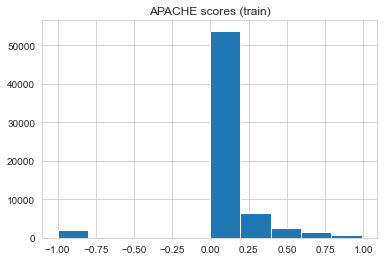

In [9]:
# histogram
y_apache_train.hist()
plt.title("APACHE scores (train)")
plt.show()

In [10]:
plt.show()

In [11]:
dftest = df

In [12]:
dftest["aD"] = (
     dftest["apache_4a_hospital_death_prob"]

)

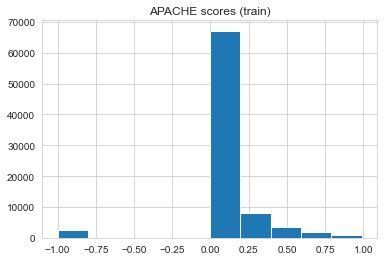

In [13]:
dftest["aD"].hist()
plt.title("APACHE scores (train)")
plt.show()

In [14]:
#thres = 0.5

In [15]:
#dftest = dftest(df[(df.score < 50) & (df.score > 20)].index)

In [16]:
#dftest["aD"][dftest["aD"]>thres]

In [17]:
#dftest = dftest.drop([dftest["aD"]==-1])

In [18]:
dftest['aD'].isnull().sum()

7947

In [19]:
dftest.dropna(subset=['aD'], inplace=True)

In [20]:
dftest.dropna(subset=['ethnicity'], inplace=True)

In [21]:
dftest.dropna(subset=['gender'], inplace=True)

In [22]:
#dftest["aD"].values_count()

In [23]:
dftest["aD"]

0        0.10
1        0.47
2        0.00
3        0.04
5        0.05
         ... 
91708    0.12
91709    0.03
91710    0.05
91711    0.07
91712    0.19
Name: aD, Length: 82474, dtype: float64

In [211]:
dftest['a4_cutoff']= dftest['apache_4a_hospital_death_prob'] >= 0.13


In [212]:
dftest['a4_cutoff'].describe()

count     80151
unique    2    
top       False
freq      58693
Name: a4_cutoff, dtype: object

In [208]:
threshold

array([1.98, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 , 0.89,
       0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79, 0.78,
       0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68, 0.67,
       0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57, 0.56,
       0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46, 0.45,
       0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35, 0.34,
       0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23,
       0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12,
       0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01,
       0.  ])

In [213]:
probs = y_apache_train
preds = dftest["aD"]#[:,1]
fpr, tpr, threshold = metrics.roc_curve(dftest["hospital_death"], preds)
roc_auc = metrics.auc(fpr, tpr)

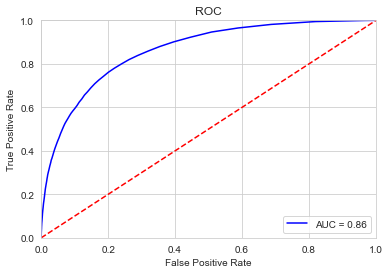

In [214]:
import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [215]:
mf = MetricFrame(metrics={'selection rate' : selection_rate}, 
                 y_true=dftest['hospital_death'], 
                 y_pred=dftest['a4_cutoff'], 
                 sensitive_features=dftest['ethnicity'])
# print results
display(mf.by_group)
print("Overall SR: %.2f" % mf.overall)

# summarize demographic parity as the max difference between groups
print("demographic parity diff: %.2f" % mf.difference(method='between_groups'))

# summarize demographic parity using the metric (this gives the exact same result as mf.difference())
dpd = demographic_parity_difference(y_true=dftest['hospital_death'], 
                                    y_pred=dftest['a4_cutoff'], 
                                    sensitive_features=dftest['ethnicity'], 
                                    method='between_groups') # summarize as the max difference between any of the groups
print("demographic parity diff: %.2f" % dpd)

selection rate
ethnicity                       
African American  0.254428      
Asian             0.265426      
Caucasian         0.268444      
Hispanic          0.293384      
Native American   0.295107      
Other/Unknown     0.258412

Overall SR: 0.27
demographic parity diff: 0.04
demographic parity diff: 0.04


In [228]:
mf = MetricFrame(metrics = 
                 {'false positive rate' : false_positive_rate,
                  'false negative rate' : false_negative_rate}, 
                 y_true=dftest['hospital_death'], 
                 y_pred=dftest['a4_cutoff'], 
                 sensitive_features=dftest[['ethnicity']])
display(mf.by_group)

# summarize differences
for i in mf.difference('between_groups').iteritems():
    print("%s diff: %.2f" % i)

# alternatively: summarize equalized odds in one metric (which is the max of fpr diff and fnr diff)
dpd = equalized_odds_difference(dftest['hospital_death'], 
                                    dftest['a4_cutoff'], 
                                    sensitive_features=dftest[['ethnicity']], 
                                    method='between_groups')
print("equalized odds diff: %.2f" % dpd)

false positive rate  false negative rate
ethnicity                                                 
African American  0.210282             0.231332           
Asian             0.214823             0.211111           
Caucasian         0.218955             0.224475           
Hispanic          0.237468             0.185629           
Native American   0.232715             0.098361           
Other/Unknown     0.209309             0.180602

false positive rate diff: 0.03
false negative rate diff: 0.13
equalized odds diff: 0.13


In [229]:
mf = MetricFrame(metrics = 
                 {'false positive rate' : false_positive_rate,
                  'false negative rate' : false_negative_rate}, 
                 y_true=dftest['hospital_death'], 
                 y_pred=dftest['a4_cutoff'], 
                 sensitive_features=dftest[['gender']])
display(mf.by_group)

# summarize differences
for i in mf.difference('between_groups').iteritems():
    print("%s diff: %.2f" % i)

# alternatively: summarize equalized odds in one metric (which is the max of fpr diff and fnr diff)
dpd = equalized_odds_difference(dftest['hospital_death'], 
                                    dftest['a4_cutoff'], 
                                    sensitive_features=dftest[['gender']], 
                                    method='between_groups')
print("equalized odds diff: %.2f" % dpd)

false positive rate  false negative rate
gender                                          
F       0.231259             0.214264           
M       0.207485             0.225451

false positive rate diff: 0.02
false negative rate diff: 0.01
equalized odds diff: 0.02


In [230]:
def negative_predictive_value_score(y_true, y_pred, **kwargs):
    """
    NPV is not in scikit-learn, but is the same as PPV but with 0 and 1 swapped. 
    """
    return precision_score(y_true, y_pred, pos_label=0, **kwargs)


In [232]:

# compute metrics
mf = MetricFrame(metrics = 
                 {'positive predictive value' : precision_score,
                  'negative predictive value' : negative_predictive_value_score}, 
                 y_true=dftest['hospital_death'], 
                 y_pred=dftest['a4_cutoff'], 
                 sensitive_features=dftest['gender'])
display(mf.by_group)

# summarize differences
for i in mf.difference('between_groups').iteritems():
    print("%s diff: %.2f" % i)

# we can also define a custom fairness metric for npv (giving the same results as mf.differnece())
npv_score_diff = make_derived_metric(metric=negative_predictive_value_score, transform='difference')
npvd = npv_score_diff(dftest['hospital_death'], 
                    dftest['a4_cutoff'], 
                    sensitive_features=dftest['gender'], 
                    method='between_groups')
print("npv diff: %.2f" % npvd)

positive predictive value  negative predictive value
gender                                                      
F       0.251566                   0.973167                 
M       0.259861                   0.973942

positive predictive value diff: 0.01
negative predictive value diff: 0.00
npv diff: 0.00


In [226]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

0.22017045454545456


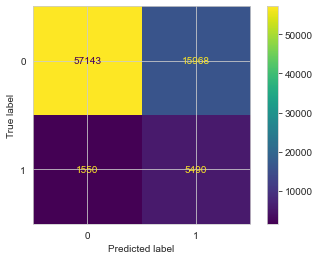

In [227]:
conf_mat = confusion_matrix(dftest['hospital_death'], dftest['a4_cutoff'])

disp = ConfusionMatrixDisplay(conf_mat)
disp.plot()
fnr = conf_mat[1,0]/(conf_mat[1,0]+conf_mat[1,1])
print(fnr)

In [216]:
# by choosing y_pred to be ground truth instead of predictions, we can easily compute the base rate in the data
mf = MetricFrame(metrics={'base rate' : selection_rate}, 
                 y_true=dftest['hospital_death'], 
                 y_pred=dftest['hospital_death'], 
                 sensitive_features=dftest['ethnicity'])
display(mf.by_group)

# summarize demographic parity as the max difference between groups
print("base rate diff: %.2f" % mf.difference(method='between_groups'))

base rate
ethnicity                  
African American  0.079060 
Asian             0.088149 
Caucasian         0.088918 
Hispanic          0.096924 
Native American   0.093272 
Other/Unknown     0.080485

base rate diff: 0.02


In [217]:
mf = MetricFrame(metrics={'selection rate' : selection_rate}, 
                 y_true=dftest['hospital_death'], 
                 y_pred=dftest['a4_cutoff'], 
                 sensitive_features=dftest['gender'])
# print results
display(mf.by_group)
print("Overall SR: %.2f" % mf.overall)

# summarize demographic parity as the max difference between groups
print("demographic parity diff: %.2f" % mf.difference(method='between_groups'))

# summarize demographic parity using the metric (this gives the exact same result as mf.difference())
dpd = demographic_parity_difference(y_true=dftest['hospital_death'], 
                                    y_pred=dftest['a4_cutoff'], 
                                    sensitive_features=dftest['gender'], 
                                    method='between_groups') # summarize as the max difference between any of the groups
print("demographic parity diff: %.2f" % dpd)

selection rate
gender                
F       0.281175      
M       0.256233

Overall SR: 0.27
demographic parity diff: 0.02
demographic parity diff: 0.02


In [218]:
# by choosing y_pred to be ground truth instead of predictions, we can easily compute the base rate in the data
mf = MetricFrame(metrics={'base rate' : selection_rate}, 
                 y_true=dftest['hospital_death'], 
                 y_pred=dftest['hospital_death'], 
                 sensitive_features=dftest['gender'])
display(mf.by_group)

# summarize demographic parity as the max difference between groups
print("base rate diff: %.2f" % mf.difference(method='between_groups'))

base rate
gender           
F       0.090022 
M       0.085966

base rate diff: 0.00


In [210]:
display(mf.by_group)


false positive rate  false negative rate
gender                                          
F       0.025397             0.680944           
M       0.024778             0.677461

In [219]:
# compute metrics
mf = MetricFrame(metrics = 
                 {'false positive rate' : false_positive_rate,
                  'false negative rate' : false_negative_rate}, 
                 y_true=dftest['hospital_death'], 
                 y_pred=dftest['a4_cutoff'], 
                 sensitive_features=dftest[['ethnicity']])
display(mf.by_group)

# summarize differences
for i in mf.difference('between_groups').iteritems():
    print("%s diff: %.2f" % i)

# alternatively: summarize equalized odds in one metric (which is the max of fpr diff and fnr diff)
dpd = equalized_odds_difference(dftest['hospital_death'], 
                                    dftest['a4_cutoff'], 
                                    sensitive_features=dftest['ethnicity'], 
                                    method='between_groups')
print("equalized odds diff: %.2f" % dpd)

false positive rate  false negative rate
ethnicity                                                 
African American  0.210282             0.231332           
Asian             0.214823             0.211111           
Caucasian         0.218955             0.224475           
Hispanic          0.237468             0.185629           
Native American   0.232715             0.098361           
Other/Unknown     0.209309             0.180602

false positive rate diff: 0.03
false negative rate diff: 0.13
equalized odds diff: 0.13


In [222]:
# compute metrics by group
mf = MetricFrame(metrics={'selection rate (APACHE IV)' : selection_rate}, 
                 y_true=dftest['hospital_death'], 
                 y_pred=dftest['a4_cutoff'], 
                 sensitive_features=dftest[['gender']])
# print results
display(mf.by_group)
print("Overall SR: %.2f" % mf.overall)

# summarize demographic parity as the max difference between groups
print("demographic parity diff: %.2f" % mf.difference(method='between_groups'))

# summarize demographic parity using the metric (this gives the exact same result as mf.difference())
dpd = demographic_parity_difference(y_true=dftest['hospital_death'], 
                                    y_pred=dftest['a4_cutoff'], 
                                    sensitive_features=dftest[['ethnicity']], 
                                    method='between_groups') # summarize as the max difference between any of the groups
print("demographic parity diff: %.2f" % dpd)

selection rate (APACHE IV)
gender                            
F       0.281175                  
M       0.256233

Overall SR: 0.27
demographic parity diff: 0.02
demographic parity diff: 0.04


In [220]:
# compute metrics
mf = MetricFrame(metrics = 
                 {'false positive rate' : false_positive_rate,
                  'false negative rate' : false_negative_rate}, 
                 y_true=dftest['hospital_death'], 
                 y_pred=dftest['a4_cutoff'], 
                 sensitive_features=dftest[['gender']])
display(mf.by_group)

# summarize differences
for i in mf.difference('between_groups').iteritems():
    print("%s diff: %.2f" % i)

# alternatively: summarize equalized odds in one metric (which is the max of fpr diff and fnr diff)
dpd = equalized_odds_difference(dftest['hospital_death'], 
                                    dftest['a4_cutoff'], 
                                    sensitive_features=dftest['gender'], 
                                    method='between_groups')
print("equalized odds diff: %.2f" % dpd)

false positive rate  false negative rate
gender                                          
F       0.231259             0.214264           
M       0.207485             0.225451

false positive rate diff: 0.02
false negative rate diff: 0.01
equalized odds diff: 0.02


In [34]:
df['age'].count()

79282

In [35]:
df['ethnicity'].describe()

count         82474
unique            6
top       Caucasian
freq          64589
Name: ethnicity, dtype: object

In [36]:
df['readmission_status'].value_counts()

0    82474
Name: readmission_status, dtype: int64

In [37]:
df['ethnicity'][df['ethnicity'] == 'Other/Unknown'].value_counts()

Other/Unknown    3798
Name: ethnicity, dtype: int64

In [39]:
df['encounter_id'].describe()

count     82474.000000
mean      65612.154679
std       37813.273671
min           3.000000
25%       32861.750000
50%       65658.500000
75%       98335.750000
max      131051.000000
Name: encounter_id, dtype: float64

In [45]:
df['gcs_motor_apache'].value_counts()

6.0    64305
5.0     7173
1.0     5049
4.0     4108
3.0      480
2.0      282
Name: gcs_motor_apache, dtype: int64

In [ ]:
decision_function = clf.decision_function(dftest['hospital_death'])

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score
  

In [49]:
dftest['apache_4a_hospital_death_prob']

0        0.10
1        0.47
2        0.00
3        0.04
5        0.05
         ... 
91708    0.12
91709    0.03
91710    0.05
91711    0.07
91712    0.19
Name: apache_4a_hospital_death_prob, Length: 82474, dtype: float64

In [48]:
clf = SVC()
clf.fit(dftest['apache_4a_hospital_death_prob'], dftest['hospital_death'])
  
# Use decision_function method.
decision_function = clf.decision_function(dftest['apache_4a_hospital_death_prob'])

ValueError: Expected 2D array, got 1D array instead:
array=[0.1  0.47 0.   ... 0.05 0.07 0.19].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [89]:
probs = y_apache_train
preds = dftest["aD"]#[:,1]
fpr, tpr, threshold = metrics.roc_curve(dftest["hospital_death"], preds)
roc_auc = metrics.auc(fpr, tpr)

In [86]:
threshold = []
gmeans = []

In [88]:
threshold

[]

In [90]:
#from sklearn.metrics import roc_curve
#y_pred_fn = dftest['apache_4a_hospital_death_prob']
#fpr, tpr, thresholds = roc_curve(y_val, y_pred_fn)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

Best Threshold=0.130000, G-Mean=0.781


In [79]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(dftest["hospital_death"], preds)

Text(0.5, 1.0, 'Precision-Recall Curve')

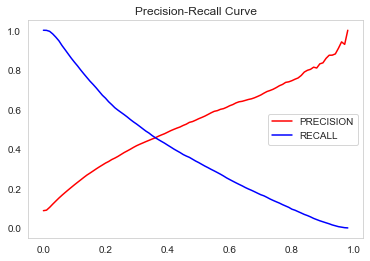

In [80]:
plt.plot(threshold, precision[:-1], c ='r', label ='PRECISION')
plt.plot(threshold, recall[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall Curve')

In [ ]:
df = df.drop(df[<some boolean condition>].index)

In [75]:
#dftest[dftest["apache_4a_hospital_death_prob"] == -1]

Empty DataFrame
Columns: [encounter_id, patient_id, hospital_id, hospital_death, age, bmi, elective_surgery, ethnicity, gender, height, hospital_admit_source, icu_admit_source, icu_id, icu_stay_type, icu_type, pre_icu_los_days, readmission_status, weight, albumin_apache, apache_2_diagnosis, apache_3j_diagnosis, apache_post_operative, arf_apache, bilirubin_apache, bun_apache, creatinine_apache, fio2_apache, gcs_eyes_apache, gcs_motor_apache, gcs_unable_apache, gcs_verbal_apache, glucose_apache, heart_rate_apache, hematocrit_apache, intubated_apache, map_apache, paco2_apache, paco2_for_ph_apache, pao2_apache, ph_apache, resprate_apache, sodium_apache, temp_apache, urineoutput_apache, ventilated_apache, wbc_apache, d1_diasbp_invasive_max, d1_diasbp_invasive_min, d1_diasbp_max, d1_diasbp_min, d1_diasbp_noninvasive_max, d1_diasbp_noninvasive_min, d1_heartrate_max, d1_heartrate_min, d1_mbp_invasive_max, d1_mbp_invasive_min, d1_mbp_max, d1_mbp_min, d1_mbp_noninvasive_max, d1_mbp_noninvasive_min, d1_resprate_max, d1_resprate_min, d1_spo2_max, d1_spo2_min, d1_sysbp_invasive_max, d1_sysbp_invasive_min, d1_sysbp_max, d1_sysbp_min, d1_sysbp_noninvasive_max, d1_sysbp_noninvasive_min, d1_temp_max, d1_temp_min, h1_diasbp_invasive_max, h1_diasbp_invasive_min, h1_diasbp_max, h1_diasbp_min, h1_diasbp_noninvasive_max, h1_diasbp_noninvasive_min, h1_heartrate_max, h1_heartrate_min, h1_mbp_invasive_max, h1_mbp_invasive_min, h1_mbp_max, h1_mbp_min, h1_mbp_noninvasive_max, h1_mbp_noninvasive_min, h1_resprate_max, h1_resprate_min, h1_spo2_max, h1_spo2_min, h1_sysbp_invasive_max, h1_sysbp_invasive_min, h1_sysbp_max, h1_sysbp_min, h1_sysbp_noninvasive_max, h1_sysbp_noninvasive_min, h1_temp_max, h1_temp_min, d1_albumin_max, d1_albumin_min, ...]
Index: []

[0 rows x 188 columns]

In [73]:
#dftest = dftest.drop(dftest[dftest["apache_4a_hospital_death_prob"] == -1].index)

In [81]:
y_train

4609     0
75674    1
84022    0
38035    0
24371    0
        ..
6265     0
54886    0
76820    0
860      0
15795    0
Name: hospital_death, Length: 73370, dtype: int64

In [84]:
probs.value_counts()

0.01    8799
0.02    7982
0.03    5968
0.04    4772
0.05    3883
        ... 
0.95      18
0.96      17
0.97       6
0.98       3
0.99       1
Name: apache_4a_hospital_death_prob, Length: 101, dtype: int64

In [95]:
correlation_stuff = X_train.copy()
correlation_stuff['hospital_death'] = y_train.copy()

corr_matrix = correlation_stuff.corr()
corr_matrix['hospital_death'].sort_values(ascending = False)

hospital_death                1.000000
cat__ethnicity_nan            0.013455
num__heart_rate_apache        0.012112
num__bmi                      0.010081
num__weight                   0.009716
                                ...   
num__d1_mbp_invasive_min     -0.008060
num__d1_sysbp_invasive_min   -0.008893
num__age                     -0.009021
num__sodium_apache           -0.009128
num__d1_sodium_min           -0.009636
Name: hospital_death, Length: 185, dtype: float64

In [96]:
matrix = dftest.corr()
print(matrix)

                             encounter_id  patient_id  hospital_id  \
encounter_id                     1.000000   -0.007382    -0.005168   
patient_id                      -0.007382    1.000000    -0.006604   
hospital_id                     -0.005168   -0.006604     1.000000   
hospital_death                  -0.005160    0.006740    -0.002769   
age                             -0.003340    0.007610    -0.005350   
...                                   ...         ...          ...   
leukemia                        -0.002038    0.000287    -0.004961   
lymphoma                        -0.000150    0.000946     0.003858   
solid_tumor_with_metastasis     -0.006102   -0.002936    -0.004501   
aD                              -0.008757    0.002151    -0.011337   
a4_cutoff                       -0.005494   -0.002285     0.000522   

                             hospital_death       age       bmi  \
encounter_id                      -0.005160 -0.003340  0.000188   
patient_id               

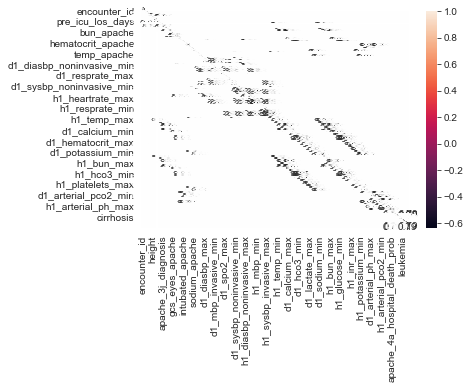

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

matrix = dftest.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [ ]:
corr_matrix = dftest.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))


In [101]:
filteredDf = matrix[((matrix >= .5) | (matrix <= -.5)) & (matrix !=1.000)]


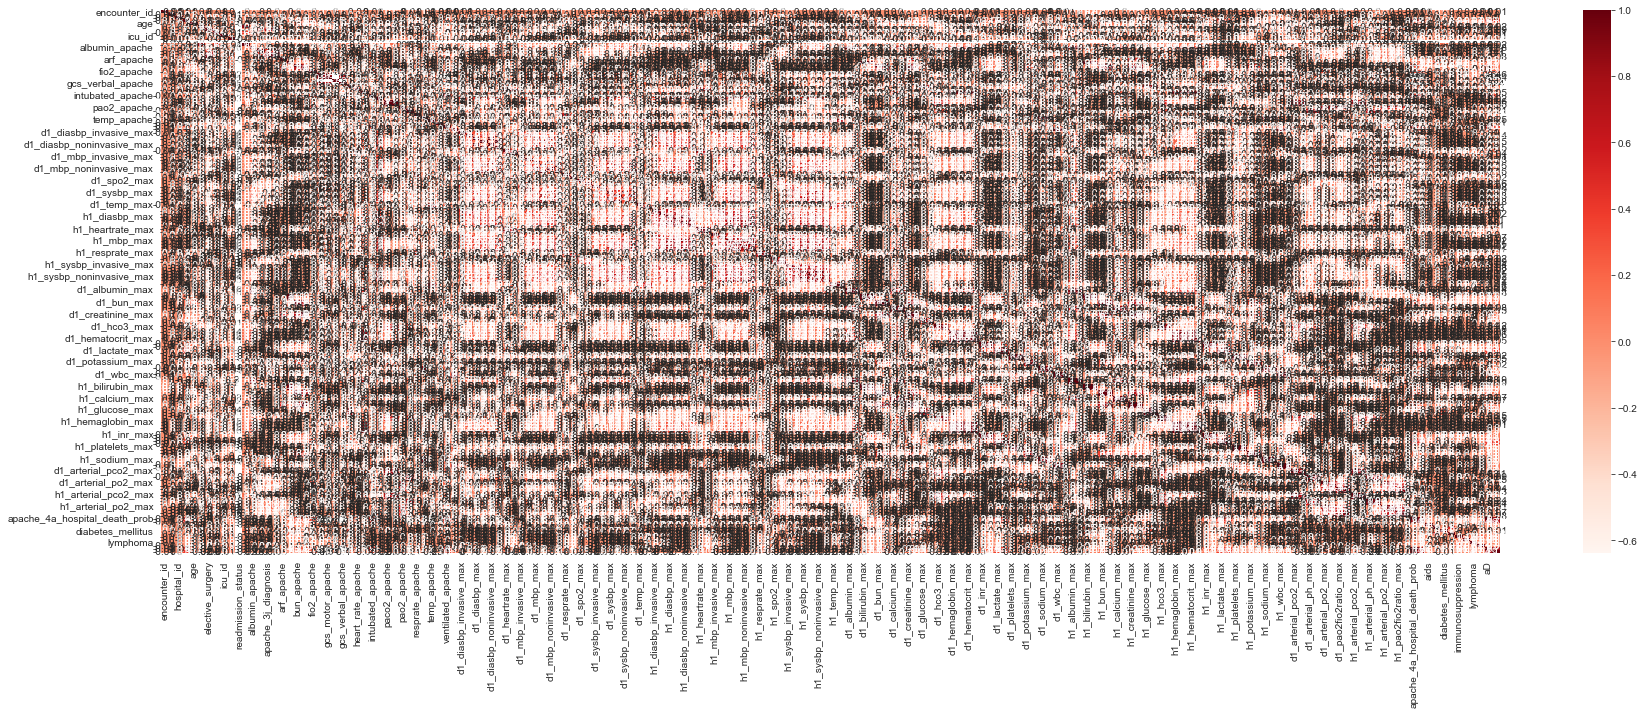

In [100]:
plt.figure(figsize=(30,10))
sns.heatmap(matrix, annot=True, cmap="Reds")
plt.show()

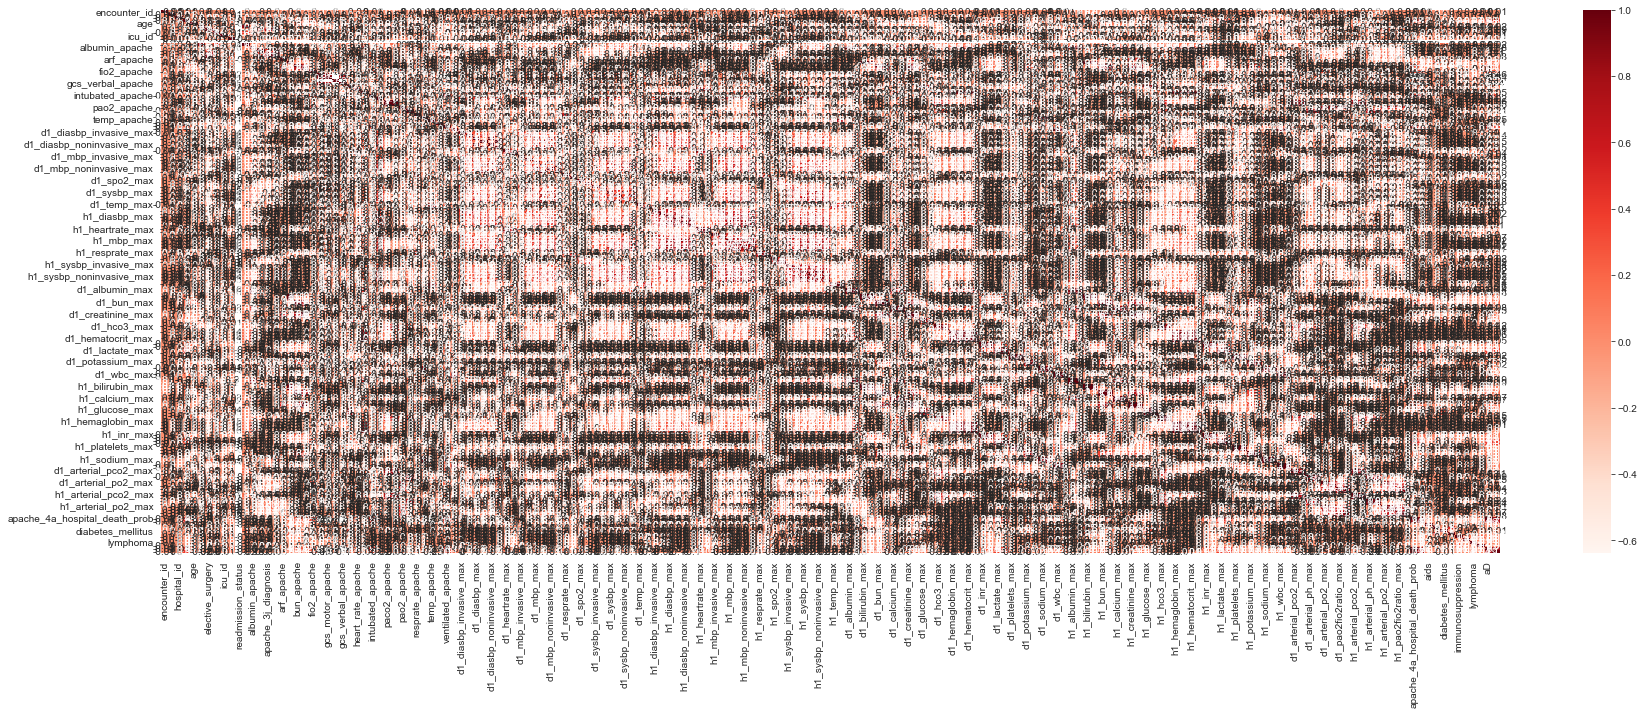

In [102]:
plt.figure(figsize=(30,10))
sns.heatmap(matrix, annot=True, cmap="Reds")
plt.show()

<AxesSubplot:>

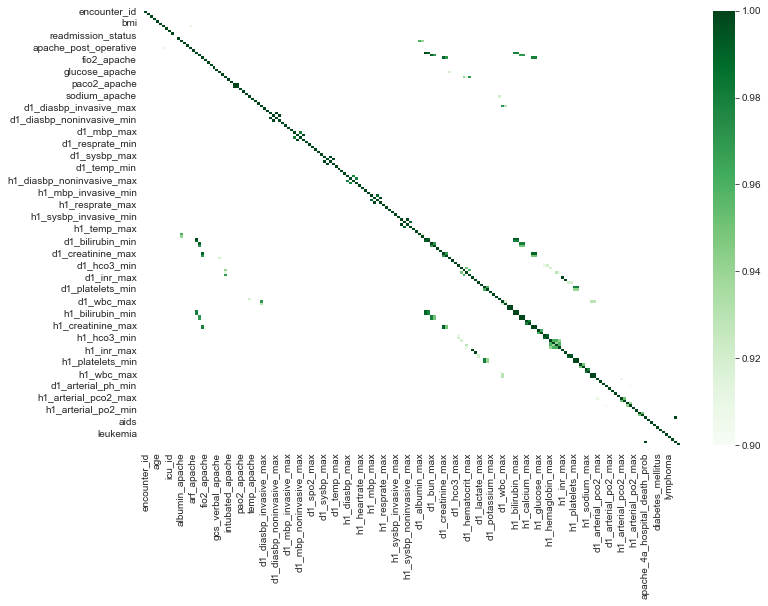

In [103]:
kot = matrix[matrix>=.9]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [104]:
matrixabs = dftest.corr().abs()

In [111]:
matrixabs

encounter_id  patient_id  hospital_id  \
encounter_id                     1.000000    0.007382     0.005168   
patient_id                       0.007382    1.000000     0.006604   
hospital_id                      0.005168    0.006604     1.000000   
hospital_death                   0.005160    0.006740     0.002769   
age                              0.003340    0.007610     0.005350   
...                                   ...         ...          ...   
leukemia                         0.002038    0.000287     0.004961   
lymphoma                         0.000150    0.000946     0.003858   
solid_tumor_with_metastasis      0.006102    0.002936     0.004501   
aD                               0.008757    0.002151     0.011337   
a4_cutoff                        0.005494    0.002285     0.000522   

                             hospital_death       age       bmi  \
encounter_id                       0.005160  0.003340  0.000188   
patient_id                         0.006740  0.007610  0.001613   
hospital_id                        0.002769  0.005350  0.011550   
hospital_death                     1.000000  0.111965  0.034213   
age                                0.111965  1.000000  0.084827   
...                                     ...       ...       ...   
leukemia                           0.030497  0.031083  0.014477   
lymphoma                           0.019464  0.022909  0.008387   
solid_tumor_with_metastasis        0.050357  0.023880  0.043987   
aD                                 0.480075  0.223627  0.043393   
a4_cutoff                          0.387004  0.081843  0.017221   

                             elective_surgery    height    icu_id  \
encounter_id                         0.000202  0.005380  0.001757   
patient_id                           0.001849  0.000720  0.000757   
hospital_id                          0.048184  0.028393  0.010047   
hospital_death                       0.094474  0.019820  0.001560   
age                                  0.065977  0.116088  0.021583   
...                                       ...       ...       ...   
leukemia                             0.017510  0.001355  0.000924   
lymphoma                             0.010334  0.007116  0.000242   
solid_tumor_with_metastasis          0.014278  0.006510  0.013087   
aD                                   0.186748  0.046485  0.003553   
a4_cutoff                            0.093758  0.009270  0.005755   

                             pre_icu_los_days  ...      aids  cirrhosis  \
encounter_id                         0.000760  ...  0.000473   0.009970   
patient_id                           0.005662  ...  0.000925   0.000829   
hospital_id                          0.006033  ...  0.006590   0.002609   
hospital_death                       0.064566  ...  0.003937   0.039159   
age                                  0.055896  ...  0.029883   0.028062   
...                                       ...  ...       ...        ...   
leukemia                             0.042923  ...  0.002567   0.006040   
lymphoma                             0.016162  ...  0.024172   0.002965   
solid_tumor_with_metastasis          0.039508  ...  0.001461   0.004284   
aD                                   0.138502  ...  0.010054   0.059993   
a4_cutoff                            0.083968  ...  0.007862   0.032563   

                             diabetes_mellitus  hepatic_failure  \
encounter_id                          0.005332         0.000552   
patient_id                            0.000033         0.002744   
hospital_id                           0.012314         0.001485   
hospital_death                        0.014390         0.037256   
age                                   0.075555         0.019966   
...                                        ...              ...   
leukemia                              0.002756         0.001902   
lymphoma                              0.003895         0.001401   
solid_tumor_with_metastasis           0.011836    

In [108]:
matrixabs.sort_values

TypeError: sort_values() missing 1 required positional argument: 'by'

In [116]:
upper_corr_mat = matrixabs.where(
    np.triu(np.ones(matrixabs.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()
print(sorted_mat)

h1_diasbp_max              encounter_id                     0.000003
h1_resprate_max            hematocrit_apache                0.000007
aids                       d1_sysbp_noninvasive_max         0.000011
urineoutput_apache         apache_2_diagnosis               0.000012
d1_diasbp_noninvasive_max  arf_apache                       0.000022
                                                              ...   
h1_bilirubin_min           h1_bilirubin_max                 0.999932
h1_inr_min                 d1_inr_min                       1.000000
h1_inr_max                 d1_inr_max                       1.000000
aD                         apache_4a_hospital_death_prob    1.000000
paco2_for_ph_apache        paco2_apache                     1.000000
Length: 15928, dtype: float64


C:\Users\kosta\AppData\Local\Temp/ipykernel_15028/1851317990.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(matrixabs.shape), k=1).astype(np.bool))


In [117]:
sorted_mat = sorted_mat.dropna()

In [137]:
sorted_mat.tail(500)

d1_diasbp_min                  d1_diasbp_invasive_min           0.474563
d1_sysbp_noninvasive_max       map_apache                       0.476893
h1_diasbp_noninvasive_min      d1_sysbp_min                     0.476936
h1_mbp_min                     h1_diasbp_invasive_max           0.477195
d1_mbp_invasive_max            d1_diasbp_invasive_max           0.477280
h1_diasbp_noninvasive_min      d1_sysbp_noninvasive_min         0.477435
h1_spo2_min                    h1_spo2_max                      0.477751
d1_arterial_po2_min            d1_arterial_po2_max              0.478184
aD                             hospital_death                   0.480075
apache_4a_hospital_death_prob  hospital_death                   0.480075
h1_diasbp_noninvasive_min      h1_diasbp_invasive_max           0.481071
d1_arterial_ph_min             d1_lactate_max                   0.481432
h1_arterial_po2_min            d1_pao2fio2ratio_min             0.482260
h1_resprate_max                resprate_apache     

In [140]:
df['icu_stay_type'].value_counts()


admit       77448
transfer    4517 
readmit     509  
Name: icu_stay_type, dtype: int64

In [145]:
df[df['hospital_death'] == 1 && df['ethnicity'] == 'Caucasian'] 

SyntaxError: invalid syntax (Temp/ipykernel_15028/2041630757.py, line 1)

In [154]:
len(df['hospital_death'])

82474

In [168]:
df['ethnicity'].value_counts()

Caucasian           64589
African American    8858 
Other/Unknown       3798 
Hispanic            3517 
Asian               1044 
Native American     668  
Name: ethnicity, dtype: int64

In [169]:
df['hospital_death'].values.sum()/len(df['hospital_death'])

0.08803986710963455

In [170]:
aa = df.loc[df['ethnicity'] == 'African American']
aa['hospital_death'].values.sum()/len(aa['hospital_death'])

0.07902461052156243

In [171]:
cc = df.loc[df['ethnicity'] == 'Caucasian']
cc['hospital_death'].values.sum()/len(cc['hospital_death'])

0.08924120206227067

In [172]:
dd = df.loc[df['ethnicity'] == 'Hispanic']
dd['hospital_death'].values.sum()/len(dd['hospital_death'])

0.09638896787034404

In [173]:
ee = df.loc[df['ethnicity'] == 'Asian']
ee['hospital_death'].values.sum()/len(ee['hospital_death'])

0.08620689655172414

In [174]:
ff = df.loc[df['ethnicity'] == 'Native American']
ff['hospital_death'].values.sum()/len(ff['hospital_death'])

0.09281437125748503

In [175]:
gg = df.loc[df['ethnicity'] == 'Other/Unknown']
gg['hospital_death'].values.sum()/len(gg['hospital_death'])

0.08056872037914692

In [178]:
df['gender']

0        M
1        F
2        F
3        F
5        M
        ..
91708    M
91709    F
91710    M
91711    F
91712    F
Name: gender, Length: 82474, dtype: object

In [179]:
mm = df.loc[df['gender'] == 'M']
mm['hospital_death'].values.sum()/len(mm['hospital_death'])

0.0860256122219726

In [180]:
fe = df.loc[df['gender'] == 'F']
fe['hospital_death'].values.sum()/len(fe['hospital_death'])

0.09040143293646613

In [186]:
un = df.loc[df['gender'].isnull()]
un['hospital_death'].values.sum()/len(un['hospital_death'])

C:\Users\kosta\AppData\Local\Temp/ipykernel_15028/3736503852.py:2: RuntimeWarning: invalid value encountered in longlong_scalars
  un['hospital_death'].values.sum()/len(un['hospital_death'])


nan

In [142]:
df['hospital_death'].value_counts()

0    75213
1    7261 
Name: hospital_death, dtype: int64

In [197]:
df['gender'].value_counts()

M    49469
F    42219
Name: gender, dtype: int64

In [203]:
 percs = pd.DataFrame({'Percentage': df.groupby(('ethnicity')).size() / len(df)})

In [204]:
percs

Percentage
ethnicity                   
African American  0.104096  
Asian             0.012310  
Caucasian         0.770709  
Hispanic          0.041390  
Native American   0.008592  
Other/Unknown     0.047692

In [205]:
un = df.loc[df['ethnicity'].isnull()]
un['hospital_death'].values.sum()/len(un['hospital_death'])

0.07526881720430108